In [58]:
import pandas as pd
import numpy as np
import matplotlib

In [90]:
n = 500 # number of trials
mu, sigma = 0, 2  # mean and standard deviation
s = np.reshape(np.random.normal(mu, sigma, n), (n,1))  # create normal distribution in an ndarray
e = np.exp(s)
#print('s is ', s)
#print(np.shape(s))
#print('e is ', e)
#print(np.shape(e))

cc = np.concatenate((s, e), axis=1)
#print('cc is ', cc)
#print(np.shape(cc))

# It took quite a while to figure out how to do this!
# I settled on the np.concatenate command above to pairwise combine the exponent and the exponentation value together 
mydata = pd.DataFrame(data=cc, columns=['normal','lognormal'])


In [91]:
# Get mean, standard deviation, quartiles, min, and max for both series
mydata.describe()

,normal,lognormal
count,500.000000,500.000000
mean,0.123136,8.526486
std,2.007858,29.784703
min,-5.477758,0.004179
25%,-1.192129,0.303575
50%,-0.065379,0.936716
75%,1.550001,4.711476
max,5.717389,304.109869


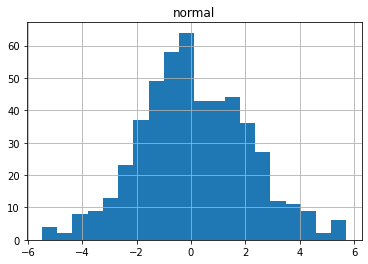

In [92]:
normalHist = mydata.hist(column='normal', bins=20)

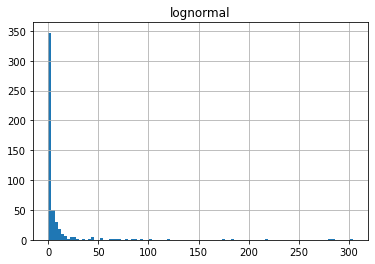

In [93]:
lognormalHist = mydata.hist(column='lognormal', bins=100)

## Now that we have some data, lets put it to use!
To learn a lesson about the danger of fat tailed distributions, we'll assume that each row of the data is the yearly outcome of an investment.  We'll flip the direction and shift the data so that the vast majority of years there is a small gain; but very occasionally there will be a big loss.  How many years can an investment like this survive?

In [97]:
year, account = 0, 100  #initial value of investment
for row in mydata.itertuples(index=False):
    year = year + 1
    account = account + ( -1 * row.lognormal + 20)
    if (account < 0):
        print(f'Busted in year {year}')
        break
    else:
        print(f'Year {year} we have {account}')


Year 1 we have 117.99741042035653
Year 2 we have 137.9096481823931
Year 3 we have 156.75279083040078
Year 4 we have 155.2400750289997
Year 5 we have 111.17358056498466
Year 6 we have 130.66635189651214
Year 7 we have 150.64287344842973
Busted in year 8


## long-term survival greatly depends on the initial amount and the offset
Eventually, a REALLY BAD year comes along.  If you were doing OK when it hit, you _might_ survive.  But if that came early, you had no chance.